Problem Statement: 


To predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image. This is a binary classification problem and we will use SVM algorithm to solve this problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import os 
os.getcwd()

'C:\\Users\\Pawas\\Anaconda Factory\\Notebooks'

In [5]:
os.chdir("d:\\_ANCONDA WORKSHOP\\_VAMSHI SIR\\datasets")

In [8]:
df=pd.read_csv("D:\\_ANCONDA WORKSHOP\\_VAMSHI SIR\\datasets\\bill_authentication.csv")

In [15]:
df.shape

(1372, 5)

In [16]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [17]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

Attributes & Labels

In [29]:
x=df.drop("Class",axis=1)
y=df['Class']
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
s.fit_transform(x)

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

Train & Test

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. This class takes one parameter, which is the kernel type. This is very important. In the case of a simple SVM we simply set this parameter as "linear" since simple SVMs can only classify linearly separable data.

In [32]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred=svc.predict(x_test)

Model Evaluation:

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [35]:
confusion_matrix(y_test,y_pred)

array([[152,   3],
       [  2, 118]], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.9818181818181818

In [37]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.98      0.98       155\n           1       0.98      0.98      0.98       120\n\n    accuracy                           0.98       275\n   macro avg       0.98      0.98      0.98       275\nweighted avg       0.98      0.98      0.98       275\n'

EDA

In [39]:
a=df.corr()

In [40]:
a

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


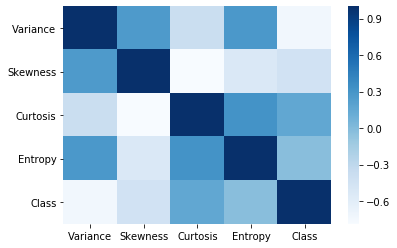

In [44]:
sns.heatmap(a,cmap='Blues')

There are many correlation the dataset therefore the accuraacy is very high

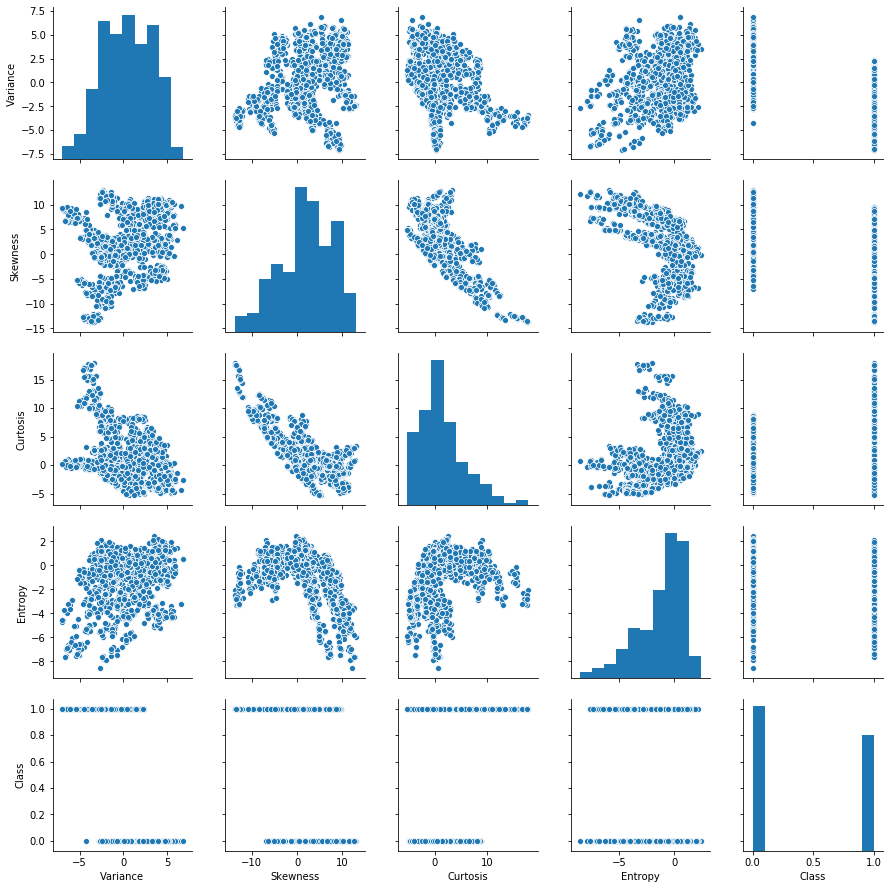

In [53]:
sns.pairplot(df)

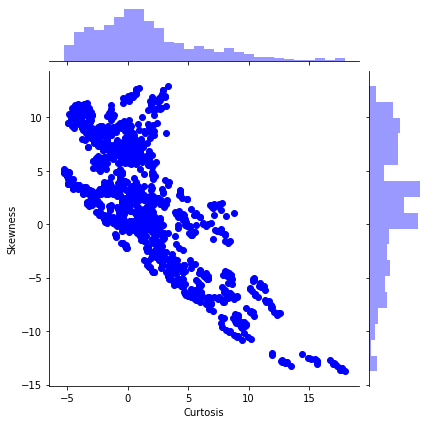

In [52]:
sns.jointplot(x="Curtosis",y="Skewness",data=df,color="Blue")

the above graph has a correlation of -0.786

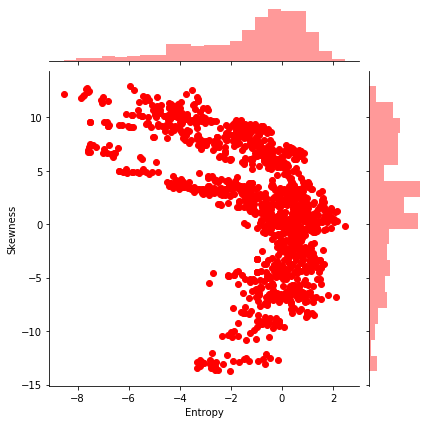

In [51]:
sns.jointplot(x="Entropy",y="Skewness",data=df,color="red")

The above graph has a correlation of -0.526